In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [4]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [9]:
print(train_df.dtypes)
print('-'*40)
print(test_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
----------------------------------------
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pengelly, Mr. Frederick William",male,347082,G6,S
freq,1,577,7,4,644


## We try to find relationship between other_feature vs Survived

In [15]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

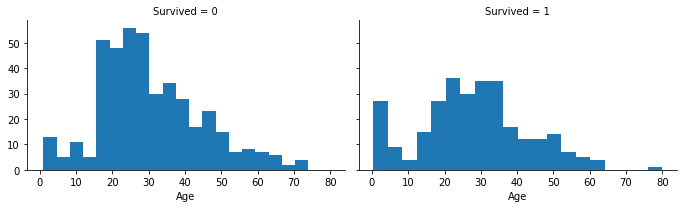

In [20]:
g = sns.FacetGrid(train_df, col='Survived', aspect=1.6)
g.map(plt.hist, 'Age', bins=20)

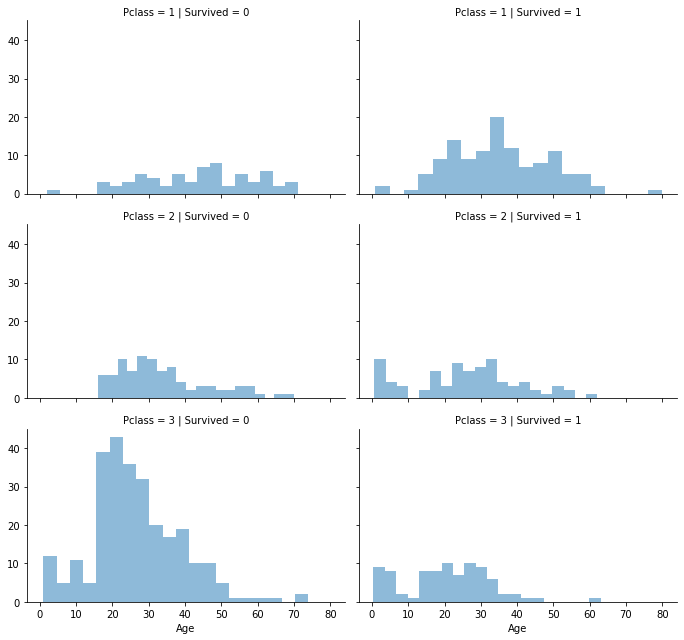

In [21]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
g.map(plt.hist, 'Age', bins=20, alpha=0.5)

C:\Users\Maharshi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Maharshi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


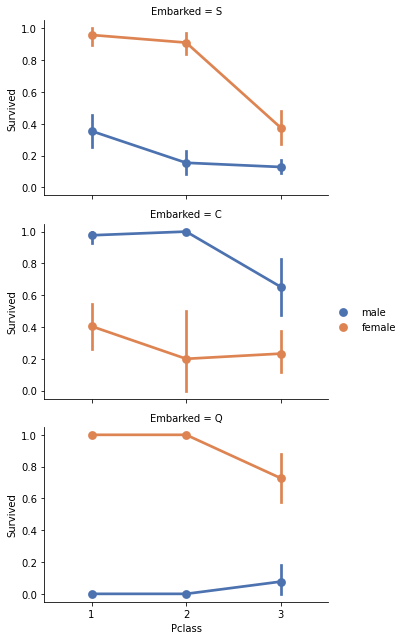

In [22]:
g = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', alpha=0.5, palette = 'deep')
g.add_legend()

C:\Users\Maharshi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


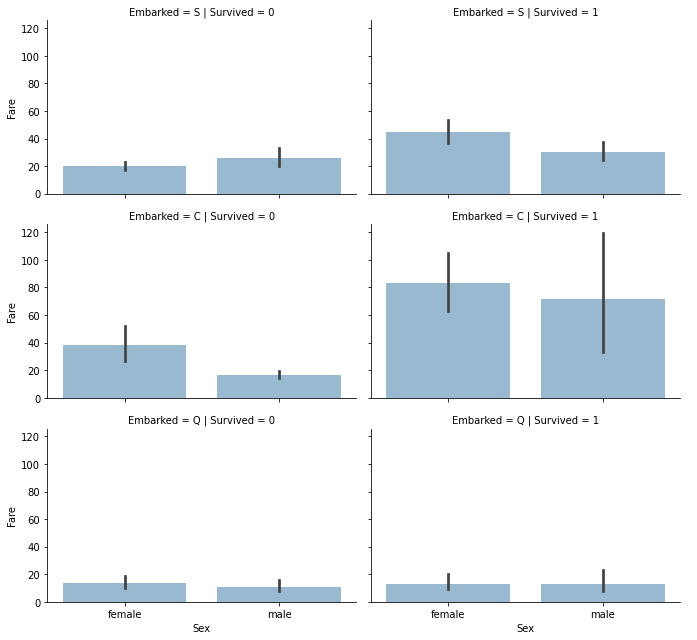

In [23]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.5)
g.add_legend()

### we perform operations on both training and testing datasets together to stay consistent.

In [24]:
print('before deleting shape')
print('train_data : ', train_df.shape)
print('test_data : ', test_df.shape)

before deleting shape
train_data :  (891, 12)
test_data :  (418, 11)


In [25]:
for dataset in combine:
    dataset = dataset.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [26]:
print('after deleting shape')
print('train_data : ', train_df.shape)
print('test_data : ', test_df.shape)

after deleting shape
train_data :  (891, 10)
test_data :  (418, 9)


In [27]:
print(train_df.columns)
print('_'*100)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')
____________________________________________________________________________________________________
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [28]:
train_df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [29]:
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.')

In [30]:
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [31]:
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Major', 
                                              'Jonkheer', 'Lady', 'Rev', 'Sir'], 'Rare')
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme'], 'Mrs')

In [32]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [33]:
train_df[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [34]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [36]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [37]:
test_df['Title']  = test_df['Name'].str.extract('([A-Za-z]+)\.')

In [38]:
pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [39]:
test_df['Title'] = test_df['Title'].replace(['Ms'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Col', 'Dona', 'Dr', 'Rev'], 'Rare')

In [40]:
test_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [41]:
train_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [42]:
pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Master,0,21
Miss,79,0
Mr,0,240
Mrs,72,0
Rare,1,5


### Title mapping

In [43]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [44]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [45]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


In [46]:
for dataset in combine:
    dataset.drop(['Name'], axis=1, inplace=True)

In [47]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,3
2,3,1,3,female,26.0,0,0,7.9250,S,2
3,4,1,1,female,35.0,1,0,53.1000,S,3
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [48]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


In [49]:
train_df.shape, test_df.shape

((891, 10), (418, 9))

In [50]:
mapping_data = {'male':0, 'female':1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(mapping_data)

In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


In [52]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


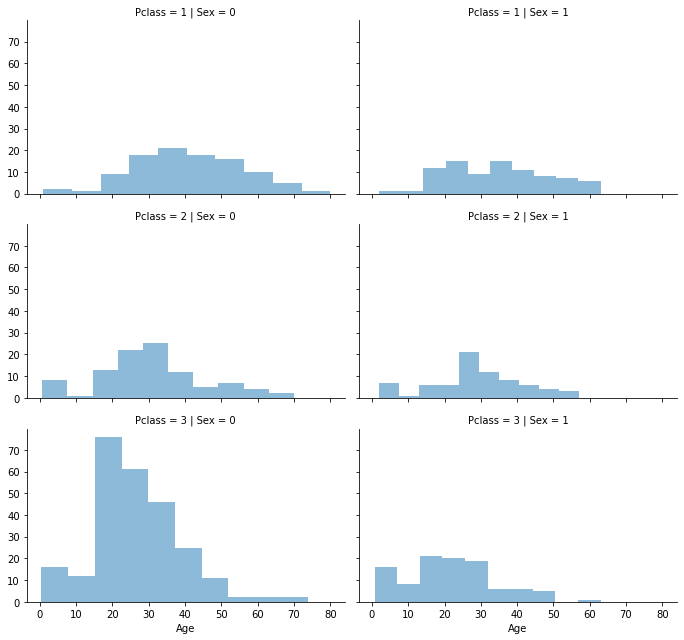

In [53]:
g = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6)
g.map(plt.hist, 'Age', alpha=0.5)

In [54]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title            int64
dtype: object

In [55]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title            int64
dtype: object

In [56]:
train_df['Age'].isnull().sum()

177

In [57]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [58]:
train_df['Age'].isnull().sum()

0

In [59]:
test_df['Age'].isnull().sum()

86

In [60]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [61]:
test_df['Age'].isnull().sum()

0

In [62]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title            int64
dtype: object

In [63]:
train_df['Age'] = train_df['Age'].astype(int)

In [64]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title            int64
dtype: object

In [65]:
test_df['Age'] = test_df['Age'].astype(int)

In [66]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Age']]

,AgeBand,Age
0,"(16.0, 32.0]",22
1,"(32.0, 48.0]",38
2,"(16.0, 32.0]",26
3,"(32.0, 48.0]",35
4,"(32.0, 48.0]",35
5,"(16.0, 32.0]",28
6,"(48.0, 64.0]",54
7,"(-0.08, 16.0]",2
8,"(16.0, 32.0]",27
9,"(-0.08, 16.0]",14


In [67]:
train_df['AgeBand'].unique()

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [68]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']


In [69]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,2,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,3,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,4,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,5,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [70]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3


In [71]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title', 'AgeBand'],
      dtype='object')

In [72]:
train_df.drop(['AgeBand'], axis=1, inplace=True)

In [73]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1,1,0,7.2500,S,1
1,2,1,1,1,2,1,0,71.2833,C,3
2,3,1,3,1,1,0,0,7.9250,S,2
3,4,1,1,1,2,1,0,53.1000,S,3
4,5,0,3,0,2,0,0,8.0500,S,1


In [74]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3


In [75]:
train_df.shape, test_df.shape

((891, 10), (418, 9))

In [76]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64

In [77]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64

In [78]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [79]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [80]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [81]:
train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize']==1, 'IsAlone'] = 1

In [82]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,0,1,1,0,7.2500,S,1,2,0
1,2,1,1,1,2,1,0,71.2833,C,3,2,0
2,3,1,3,1,1,0,0,7.9250,S,2,1,1
3,4,1,1,1,2,1,0,53.1000,S,3,2,0
4,5,0,3,0,2,0,0,8.0500,S,1,1,1


In [83]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [84]:
test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize']==1, 'IsAlone'] = 1

In [85]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,0,7.8292,Q,1,1,1
1,893,3,1,2,1,0,7.0000,S,3,2,0
2,894,2,0,3,0,0,9.6875,Q,1,1,1
3,895,3,0,1,0,0,8.6625,S,1,1,1
4,896,3,1,1,1,1,12.2875,S,3,3,0


In [86]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [87]:
train_df = train_df.drop(['Parch', 'FamilySize', 'SibSp'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,1,7.2500,S,1,0
1,2,1,1,1,2,71.2833,C,3,0
2,3,1,3,1,1,7.9250,S,2,1
3,4,1,1,1,2,53.1000,S,3,0
4,5,0,3,0,2,8.0500,S,1,1


In [88]:
test_df = test_df.drop(['Parch', 'FamilySize', 'SibSp'], axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,Q,1,1
1,893,3,1,2,7.0000,S,3,0
2,894,2,0,3,9.6875,Q,1,1
3,895,3,0,1,8.6625,S,1,1
4,896,3,1,1,12.2875,S,3,0


In [89]:
train_df.shape, test_df.shape

((891, 9), (418, 8))

In [90]:
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [91]:
train_df['Embarked'].isnull().sum()

2

In [92]:
freq = train_df['Embarked'].dropna().mode()[0]
freq

'S'

In [93]:
train_df['Embarked'] = train_df['Embarked'].fillna(freq)

In [94]:
train_df['Embarked'].isnull().sum()

0

In [95]:
test_df['Embarked'].isnull().sum()

0

In [96]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [97]:
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'Q':1, 'C':2}).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,1,7.2500,0,1,0
1,2,1,1,1,2,71.2833,2,3,0
2,3,1,3,1,1,7.9250,0,2,1
3,4,1,1,1,2,53.1000,0,3,0
4,5,0,3,0,2,8.0500,0,1,1


In [98]:
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'Q':1, 'C':2}).astype(int)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,1,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,1,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [99]:
train_df['Fare'].isna().sum(), test_df['Fare'].isna().sum()

(0, 0)

In [100]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [101]:
test_df['FareBand'] = 0

In [102]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,1,0,3,0,1,7.2500,0,1,0,"(-0.001, 7.91]"
1,2,1,1,1,2,71.2833,2,3,0,"(31.0, 512.329]"
2,3,1,3,1,1,7.9250,0,2,1,"(7.91, 14.454]"
3,4,1,1,1,2,53.1000,0,3,0,"(31.0, 512.329]"
4,5,0,3,0,2,8.0500,0,1,1,"(7.91, 14.454]"


In [103]:
train_df['Fare'].dtypes

dtype('float64')

In [104]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3
train_df['Fare'] = train_df['Fare'].astype(int)

In [105]:
test_df.loc[ test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare']   = 2
test_df.loc[ test_df['Fare'] > 31, 'Fare'] = 3
test_df['Fare'] = test_df['Fare'].astype(int)

In [106]:
train_df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,1,0,3,0,1,0,0,1,0,"(-0.001, 7.91]"
1,2,1,1,1,2,3,2,3,0,"(31.0, 512.329]"
2,3,1,3,1,1,1,0,2,1,"(7.91, 14.454]"
3,4,1,1,1,2,3,0,3,0,"(31.0, 512.329]"
4,5,0,3,0,2,1,0,1,1,"(7.91, 14.454]"
5,6,0,3,0,1,1,1,1,1,"(7.91, 14.454]"
6,7,0,1,0,3,3,0,1,1,"(31.0, 512.329]"
7,8,0,3,0,0,2,0,4,0,"(14.454, 31.0]"
8,9,1,3,1,1,1,0,3,0,"(7.91, 14.454]"
9,10,1,2,1,0,2,2,3,0,"(14.454, 31.0]"


In [107]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,892,3,0,2,0,1,1,1,0
1,893,3,1,2,0,0,3,0,0
2,894,2,0,3,1,1,1,1,0
3,895,3,0,1,1,0,1,1,0
4,896,3,1,1,1,0,3,0,0


In [108]:
train_df = train_df.drop(['FareBand'], axis=1)

In [109]:
test_df = test_df.drop(['FareBand'], axis=1)

In [110]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,1,0,0,1,0
1,2,1,1,1,2,3,2,3,0
2,3,1,3,1,1,1,0,2,1
3,4,1,1,1,2,3,0,3,0
4,5,0,3,0,2,1,0,1,1


In [111]:
test_df.head(20)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,1,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,1,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0
5,897,3,0,0,1,0,1,1
6,898,3,1,1,0,1,2,1
7,899,2,0,1,2,0,1,0
8,900,3,1,1,0,2,3,1
9,901,3,0,1,2,0,1,0


In [112]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Title', 'IsAlone'],
      dtype='object')

In [113]:
X_train = train_df.drop(['PassengerId', 'Survived'], axis=1)
y_train = train_df['Survived']

In [114]:
train_df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int32
Fare           int32
Embarked       int32
Title          int64
IsAlone        int64
dtype: object

In [115]:
test_df.dtypes

PassengerId    int64
Pclass         int64
Sex            int64
Age            int32
Fare           int32
Embarked       int32
Title          int64
IsAlone        int64
dtype: object

In [116]:
X_train.shape, y_train.shape

((891, 7), (891,))

In [117]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone'],
      dtype='object')

In [118]:
X_test = test_df.drop(['PassengerId'], axis=1)

## logistic Regression

In [119]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

79.12

In [120]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Pclass,2.170528
5,Embarked,0.426018
4,Fare,0.307096
6,Title,0.073044
2,Sex,-0.031493
3,Age,-0.065784
0,Survived,-0.964817
7,IsAlone,NaN


In [121]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

78.45

In [122]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.41

In [123]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

76.21

In [124]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

71.83

In [125]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\Maharshi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


78.34

In [126]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

76.32

In [127]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

86.98

In [128]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

86.98

In [129]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.98
8,Decision Tree,86.98
1,KNN,85.41
2,Logistic Regression,79.12
0,Support Vector Machines,78.45
7,Linear SVC,78.34
6,Stochastic Gradient Decent,76.32
4,Naive Bayes,76.21
5,Perceptron,71.83


In [130]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)